# Loi binomiale

## Expérience pour faire émerger la loi binomiale

&#x25CB; &#x25CB; &#x25CB;  
&#x25CF; &#x25CF; &#x25CF;  
&#x25CF; &#x25CF; &#x25CF;  

Dans une urne on place:
- 3 boules blanches (`1`)
- 6 boules noires (`0`)

Ici la proportion de boules blanches `p=1/3`.

On effectue `n` tirages avec remise.

Quelle est la probabilité d'avoir tiré `k` fois une boule blanche?

&#x25CF; &#x25CF;  
&#x25CF; &#x25CB; &#x25CB;  
&#x25CB; &#x25CF; &#x25CF; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &#x25CF;  

&#x25CF; &#x25CB; &#x25CB;  
&#x25CF; &#x25CF;  
&#x25CF; &#x25CF; &#x25CF; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &#x25CB;  


&#x25CB; &#x25CB;  
&#x25CF; &#x25CF; &#x25CF;  
&#x25CB; &#x25CF; &#x25CF; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &#x25CF;



$$\mathcal{B}(n,p)$$
$$P(X=k)= {n\choose k}p^k(1-p)^{n-k}$$

## Approximation de B(10, 1/3)

In [1]:
import random

In [2]:
urne = [1]*3 + [0]*6
urne

[1, 1, 1, 0, 0, 0, 0, 0, 0]

In [3]:
random.choice(urne)

1

Faisons `s` fois dix tirages.

Voyons combien de boules blanches on tire sur chacune de ces séries de `n = 10` tirages.

Ca va nous permettre d'approximer la propabilité de l'évévement: "je tire k boules blanches sur n tirages avec remise".

$$\mathcal{B}(n=10,p=\frac{1}{3})$$


In [4]:
from collections import Counter
random.seed(42)
blanches = []
n=10  # nombre de tirages
s = 1000000 # nombre de séries de n tirages
for _ in range(s):
    série_de_n_tirages = [random.choice(urne) for tirage in range(n)]
    blanches.append(sum(série_de_n_tirages))
c = Counter(blanches)
c

Counter({3: 260045,
         4: 228349,
         2: 194523,
         5: 136949,
         1: 86719,
         6: 56718,
         0: 17214,
         7: 16162,
         8: 2979,
         9: 329,
         10: 13})

In [5]:
# nombre de fois où l'on tire une boule blanche
# liste 0 à 10 inclus

# probabilité estimée par comptage du nombre de fois où l'on a tiré k boules blanches
p = [c[k]/s*100 for k in list(range(11))]

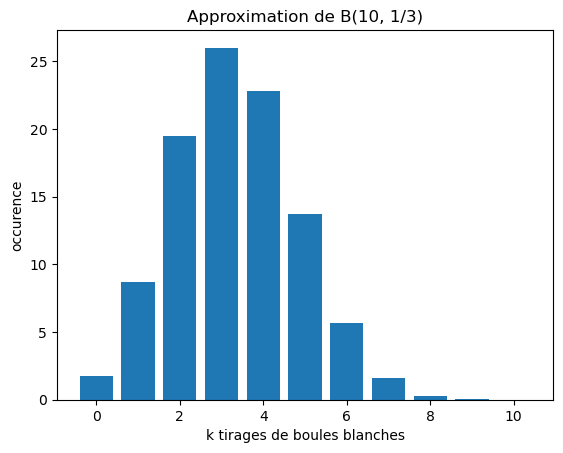

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.bar(list(range(11)), p)
ax.set_xlabel('k tirages de boules blanches')
ax.set_ylabel('occurence')
ax.set_title('Approximation de B(10, 1/3)')
plt.show()

In [7]:
c[0]/s*100

1.7214

In [8]:
c[10]/s*100

0.0013

In [9]:
c[3]/s*100

26.004500000000004

## Approximation de B(50, 1/3)

Maintenant on fait 50 tirages:

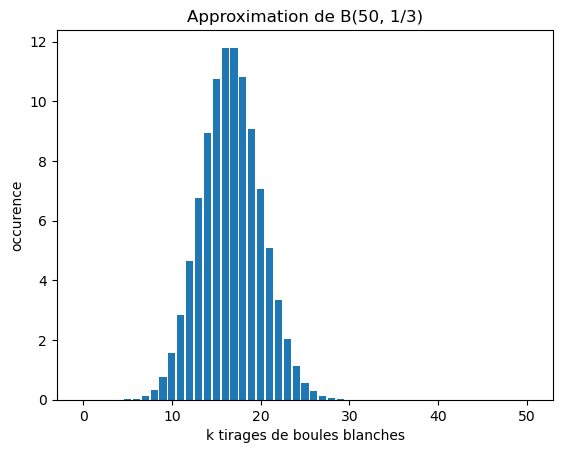

In [14]:
blanches = []
n=50  # nombre de tirages
s = 1000000 # nombre de séries de n tirages
for _ in range(s):
    série_de_n_tirages = [random.choice(urne) for tirage in range(n)]
    blanches.append(sum(série_de_n_tirages))
c = Counter(blanches)
p = [c[k]/s*100 for k in list(range(n+1))]

fig, ax = plt.subplots()
plt.bar(list(range(n+1)), p)
ax.set_xlabel('k tirages de boules blanches')
ax.set_ylabel('occurence')
ax.set_title('Approximation de B(50, 1/3)')
plt.show()

In [11]:
c.most_common(1)

[(16, 118159)]

## Loi binomiale théorique

Tracé des probabilités théoriques données par la formule de la loi binomiale: $\mathcal{B}(n=50,p=\frac{1}{3})$

$$P(X=k)= {n\choose k}p^k(1-p)^{n-k}$$

In [12]:
# math.comb(n, k)
import math

def loi_binomiale(k, n=2, p=0.5):
    return math.comb(n, k) * p**k * (1-p)**(n-k)

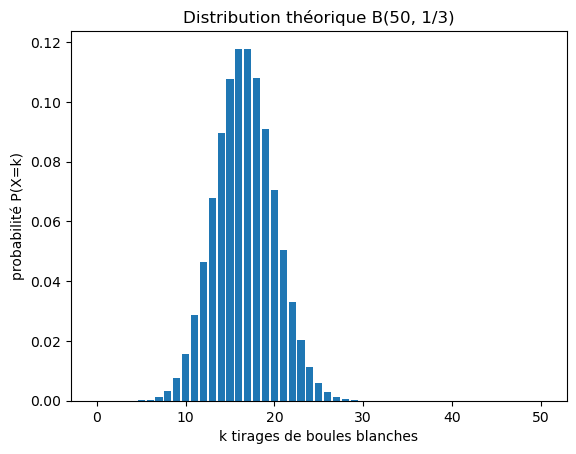

In [13]:
# Distribution théorique
n=50  # nombre de tirages
p=1/3
p = [loi_binomiale(k, n, p) for k in list(range(n+1))]

fig, ax = plt.subplots()
plt.bar(list(range(n+1)), p)
ax.set_xlabel('k tirages de boules blanches')
ax.set_ylabel('probabilité P(X=k)')
ax.set_title('Distribution théorique B(50, 1/3)')
plt.show()